In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import Akima1DInterpolator



In [5]:




##reynholds number equation

def Re(row,u,L,mew):
    calc = (row*u*L)/mew
    
    return calc







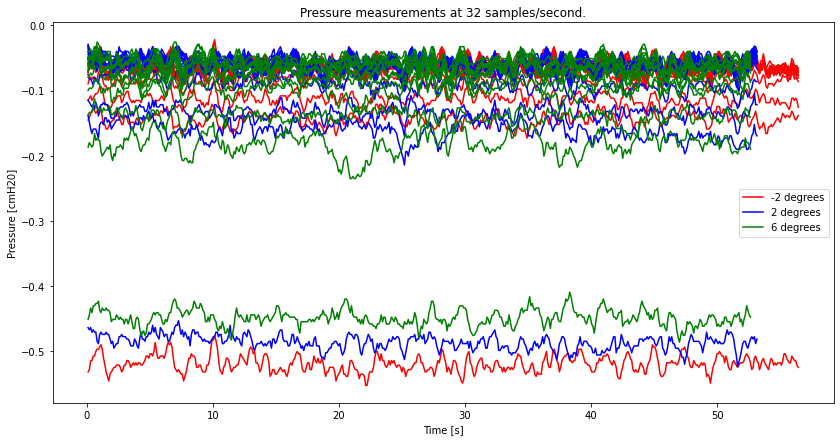

In [6]:
## for the sampling rate of 32

N2_32 = pd.read_csv('-2,32_rake.csv',header = None)
time_N2_32 = N2_32[0]
Pn2_32 = N2_32.drop(columns = [0,15,16])

test2_32 = pd.read_csv('2,32_rake.csv',header = None)
time_2_32 = test2_32[0]
P2_32 = test2_32.drop(columns = [0,15,16])

test6_32 = pd.read_csv('6,32_rake.csv',header = None)
time_6_32 = test6_32[0]
P6_32 = test6_32.drop(columns = [0,15,16])



plt.figure(figsize = [14,7])
plt.plot(time_N2_32,Pn2_32,'r')
plt.plot(time_2_32,P2_32,'b')
plt.plot(time_6_32,P6_32,'g')
plt.xlabel("Time [s]")
plt.ylabel('Pressure [cmH20]')
plt.plot([],[],'r',label = '-2 degrees' )
plt.plot([],[],'b',label = '2 degrees' )
plt.plot([],[],'g',label = '6 degrees' )
plt.title("Pressure measurements at 32 samples/second.")
plt.legend()
plt.savefig('Pressure measurements_32', format = 'pdf')



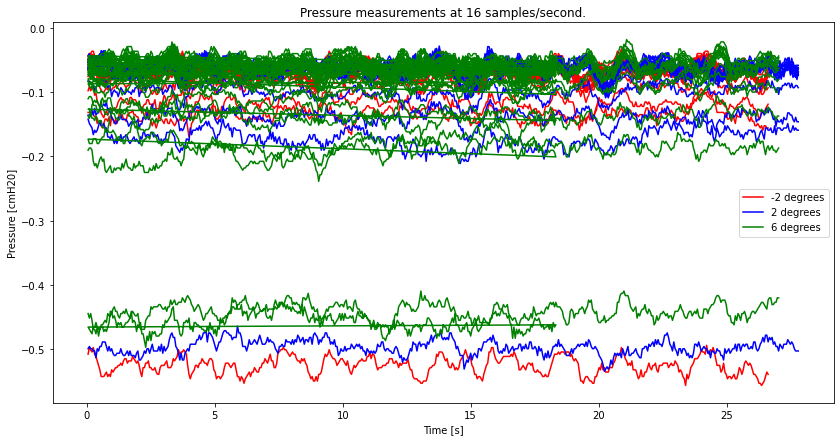

In [7]:
##graph for the sampling rate of 16 Hz

N2_16 = pd.read_csv('-2,16_rake.csv',header = None)
time_N2_16 = N2_16[0]
Pn2_16 = N2_16.drop(columns = [0,15,16])

test2_16 = pd.read_csv('2,16_rake.csv',header = None)
time_2_16 = test2_16[0]
P2_16 = test2_16.drop(columns = [0,15,16])

test6_16 = pd.read_csv('6,16_rake.csv',header = None)
time_6_16 = test6_16[0]
P6_16 = test6_16.drop(columns = [0,15,16])



plt.figure(figsize = [14,7])
plt.plot(time_N2_16,Pn2_16,'r')
plt.plot(time_2_16,P2_16,'b')
plt.plot(time_6_16,P6_16,'g')
plt.xlabel("Time [s]")
plt.ylabel('Pressure [cmH20]')
plt.plot([],[],'r',label = '-2 degrees' )
plt.plot([],[],'b',label = '2 degrees' )
plt.plot([],[],'g',label = '6 degrees' )
plt.title("Pressure measurements at 16 samples/second.")
plt.legend()
plt.savefig('Pressure measurements_16', format = 'pdf')

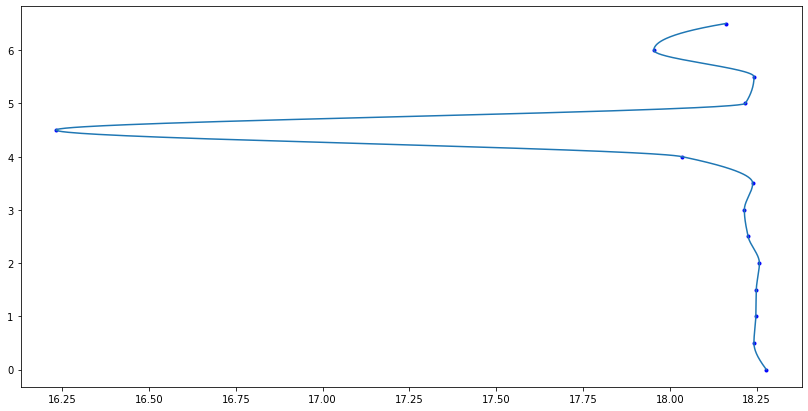

In [9]:
##Calculating the average velocity over the whole test using the 32 samples/s data

#constants

rowW = 997 #density of water in kg/m^3
g = 9.81 #acceleration due to gravity in m/s^2
row = 1.293 #air density


#-2 degree rake angle

##static pressure for upstream and down stream

down_static = N2_32[15]

##mean pressure and velocity calculations

mean_pN2 = np.mean(Pn2_16)*rowW*g*10**-2
meanStatic_pN2 = np.mean(down_static)*rowW*g*10**-2

velocity_N2 = np.sqrt(2*(mean_pN2 - float(meanStatic_pN2))/row)

        
heights = (velocity_N2.index-1)*0.5

vel = PchipInterpolator(heights,velocity_N2)

h_new = np.linspace(0,max(heights),1000)
v_new = vel(h_new)


#plotting the results
plt.figure(figsize = [14,7])
plt.plot(velocity_N2,heights,'.b',label = 'rake angle of')
plt.plot(v_new,h_new)



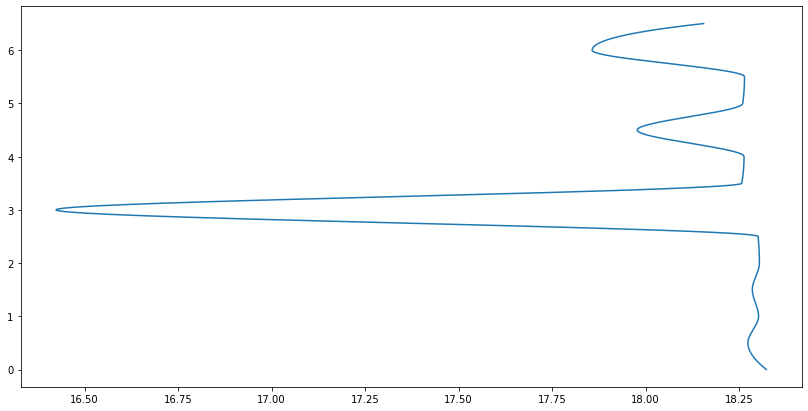

In [10]:
## 2 degree angle

down_static2 = test2_32[15]
mean_p2 = np.mean(P2_32)*rowW*g*10**-2
meanStatic_p2 = np.mean(down_static2)*rowW*g*10**-2


##mean velocity calculations


velocity_2 = np.sqrt(2*(mean_p2 - float(meanStatic_p2))/row)

#interpolation

vel2 = PchipInterpolator(heights,velocity_2)

v_new2 = vel2(h_new)

plt.figure(figsize =[14,7])
plt.plot(v_new2,h_new)



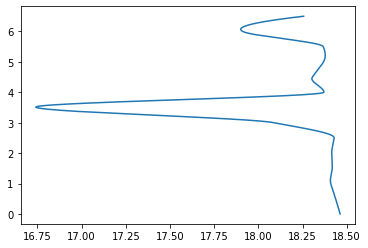

In [11]:
##6 degree angle

down_static6 = test6_32[15]
mean_p6 = np.mean(P6_32)*rowW*g*10**-2
meanStatic_p6 = np.mean(down_static6)*rowW*g*10**-2


##mean velocity calculations


velocity_6 = np.sqrt(2*(mean_p6 - float(meanStatic_p6))/row)

#interpolation

vel6 = Akima1DInterpolator(heights,velocity_6)

v_new6 = vel6(h_new)

plt.figure()
plt.plot(v_new6,h_new)

In [12]:
##reynolds number for each angle of attack

##-2 degrees

# re_N2 = Re(row,19.9,6*2.54e-2,mew)




NameError: name 'mew' is not defined

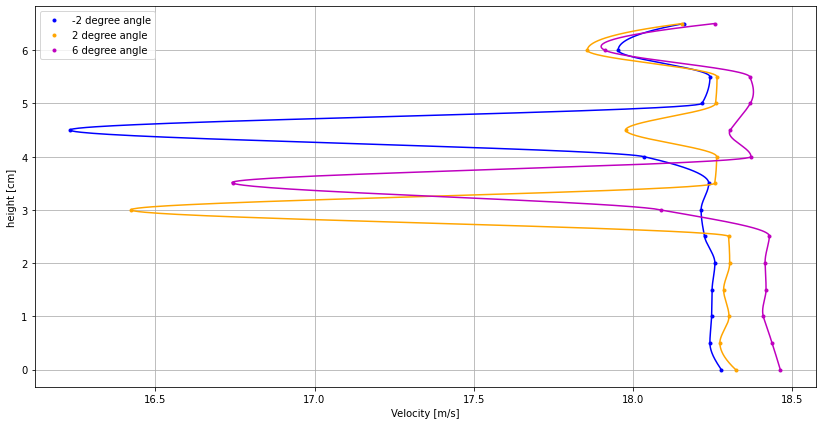

In [14]:
##plotting the velocity profile for each attack angle

plt.figure(figsize = [14,7])
plt.plot(velocity_N2,heights,'.',color = 'b',label = '-2 degree angle')
plt.plot(v_new,h_new,color = 'b')
plt.plot(velocity_2,heights,'.',color = 'orange',label = '2 degree angle')
plt.plot(v_new2,h_new,color = 'orange')
plt.plot(velocity_6,heights,'.',color = 'm',label = '6 degree angle')
plt.plot(v_new6,h_new,color = 'm')
plt.xlabel('Velocity [m/s]')
plt.ylabel('height [cm]')
plt.grid()
plt.legend()
plt.savefig('airfoil_velocity profile', format = 'pdf') 


In [15]:
##CALCULATING THE DRAG FORCE

def dragF(v,u_i,y): ##numerical integration of the velocity profile to get the total drag force.
    row = 1.293 #air density
    span = 12*2.54e-2
    Fd = 0
    
    for i in range(len(y)-1):
        Fd += span*row*np.abs(v[i]*(u_i - v[i]))*(y[i+1]-y[i])*10**(-2)
    return Fd


##-2 degree angle of attack
# velocity_N2


Fd_N2 = dragF(v_new,max(v_new),h_new)


print('For and angle of attack of -2 degrees:',np.round(Fd_N2,6))

##angle of attack of 2 degrees

Fd_2 = dragF(v_new2,max(v_new2),h_new)
print('For and angle of attack of 2 degrees:',np.round(Fd_2,6))

##angle of attack of 6 degrees

Fd_6 = dragF(v_new6,max(v_new6),h_new)
print('For and angle of attack of 6 degrees:',np.round(Fd_6,6))



For and angle of attack of -2 degrees: 0.103927
For and angle of attack of 2 degrees: 0.111158
For and angle of attack of 6 degrees: 0.119938


In [16]:
##Drag coefficients

A = 2*12*(2.54e-2)*6*2.54e-2

#function to calculate the total drag coefficient

def Cd(A,Ui,Fd):
    c = Fd/(A*0.5*row*Ui**2)
    return c

##for an angle of attack of -2

Cd_N2 = Cd(A,max(v_new),Fd_N2)

##drag coeff for angle of 2 degrees.
Cd_2 = Cd(A,max(v_new2),Fd_2)

#drag coeff for angle of 6 degrees.
Cd_6 = Cd(A,max(v_new6),Fd_6)

print(Cd_N2,Cd_2,Cd_6)


0.005179605151466244 0.0055128095525599895 0.0058580497224590975


In [17]:
##percent difference between measured velocity and calculated

##attack angle of -2

pdiffN2 = 100*(19.9- max(v_new))/max(v_new)

print(pdiffN2)

pdiff2 = 100*(20- max(v_new2))/max(v_new2)

print(pdiff2)

pdiff6 = 100*(20.15- max(v_new6))/max(v_new6)
print(pdiff6)


##Difference between calculated and theoretical lift and drag coefficients

cdiff_N2 = 100*(0.01-0.005)/0.005
cdiff_2 = 100*(0.01-(-0.01))/0.01
cdiff_6 = 100*(0.0125-0.014)/-0.0125

print(cdiff_N2,cdiff_2,cdiff_6)

8.877231079976319
9.155457114216109
9.13711539366688
100.0 200.0 11.999999999999996


In [22]:
## reynolds number calculations for each angle of attack

#constants
Cl = 6*2.54e-2 #chord lenght of the wind in [m]
mew = 1.825e-5

vN2 = 19.9
v2 = 20.0
v6 = 20.125

reN2 = Re(row,vN2,Cl,mew)
re2 = Re(row,v2,Cl,mew)
re6 = Re(row,v6,Cl,mew)

averageRe = np.mean([reN2,re2,re6])

print("The average reynholds number is {:.2f} which indicated the flow is laminar".format(averageRe))

print(reN2,re2,re6)

The average reynholds number is 216038.69 which indicated the flow is laminar
214868.9687671232 215948.71232876708 217298.3917808219


In [498]:
data2_32 = pd.read_csv('2,32_Test.csv',header = None)
data2_32.drop(columns = [0,15,16]).copy()



staticP = data2_32[[15,16]] #static pressure before and after the airfoil




In [26]:
##reynholds number for the first test 22 degree AOT

row = 1.293 #air density
mew = 1.83e-5 #air dymnamic viscocity
u2 = 19.9
L = 6*2.54e-2
re2 = Re(row,u2,L,mew)

print('A reynolds number of ',np.round(re2,2),' tells us that the flow is laminar\n')


##reynolds number for the test at 6 degrees

u3 = np.mean([20.1,20.2])

re3 = Re(row,u3,L,mew)

print("A reynolds number of ",re3,' tells us that the flow is transitional')


A reynolds number of  214281.9  tells us that the flow is laminar

A reynolds number of  216973.8786885245  tells us that the flow is transitional


In [537]:
##CONSTANTS

rowW = 997 #density of water in kg/m^3
g = 9.81 #acceleration due to gravity in m/s^2
patm = 101e3 # measureed atmospheric pressure in pa



#Flat plate measurements


#downstream measurements

downstream = pd.DataFrame({'height':[0, 2.00, 4.00, 6.00, 8.00, 10.00, 12.00, 14.00, 16.00, 18.00,20.00,22.00], 
                           'pressure':[0.42, 0.34, 0.24, 0.16,0.08, 0.06, 0.04, 0.04, 0.02, 0.02, 0.02, 0.02]})

##upstream measurements

upstream = pd.DataFrame({'height': [0, 0.06, 0.13, 0.19, 0.25, 0.31, 0.38, 0.44, 0.50, 0.56, 0.63],
                         'pressure':[0.42,0.32,0.24,0.17,0.1,0.06,0.04,0.02,0.02,0.02,0.02]})

#converting the angled meassurements to vertical and to [mm].
upheight = (upstream['height']*2.54e1).copy() 

dheight = downstream['height'].copy() 


#upstream velocity in m/s

upvel = np.sqrt(2*rowW*g*(1-np.sin(20.225*np.pi/180)*upstream['pressure'])*2.54e-2/row)
dvel =  np.sqrt(2*rowW*g*(1-np.sin(20.225*np.pi/180)*downstream['pressure'])*2.54e-2/row)



interpo_U = PchipInterpolator(upheight,upvel)
interpo_D = PchipInterpolator(dheight,dvel)

##creating new height values
h = np.linspace(0,22,1000)

v_upnew = interpo_U(h)
v_downNew = interpo_D(h)







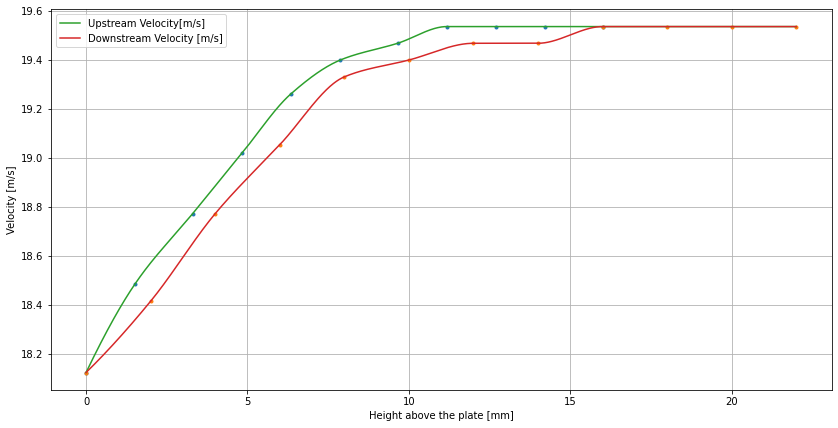

In [538]:
##plotting the velocity as a function of height

plt.figure(figsize = [14,7])
plt.plot(upheight,upvel,'.')
plt.plot(dheight,dvel,'.')
plt.plot(h,v_upnew, label = 'Upstream Velocity[m/s]')
plt.plot(h,v_downNew,label = 'Downstream Velocity [m/s]')
plt.xlabel('Height above the plate [mm]')
plt.ylabel('Velocity [m/s]')
plt.grid()
plt.legend()
# plt.savefig('Flat plate velocty profile', format = 'pdf')

In [502]:
##reynholds number for upstream and downstream locations

U_up = 20.46 # upstream velocity in m/s

U_down = 20.46 #downstream velocity in m/s

L_up = 45e-2 #distance to upstream pitot tube

L_down = 71.6e-2 #distance to downstream pitot [m]

upstream_Re = Re(row,U_up,L_up,mew)

downstream_Re = Re(row,U_down,L_down,mew)
    
print('The reyhnolds upstream is {:.2f}, and {:.2f} downstream'.format(upstream_Re,downstream_Re))

print('\nThis means that the flow is turbulent over the whole plate')

The reyhnolds upstream is 650527.38, and 1035061.34 downstream

This means that the flow is turbulent over the whole plate


In [556]:
##Functions for displacement thickness and momentumm thickness.

def displace(u,Ui,delta):
    dt = 0
    for i in range(len(delta)-1):
        dt += (1-u[i]/Ui)*(delta[i+1]-delta[i])
    return dt

def momentumT(u,Ui,delta):
    mt = 0
    for i in range(len(delta)-1):
        mt += (u[i]/Ui)*(1-u[i]/Ui)*(delta[i+1]-delta[i])
    return mt





In [559]:
## discplacement thickness calculations for both plots


##upstream

deltaU = np.linspace(0,11,1000)
u_yU = interpo_U(deltaU)

upstream_thickness = displace(u_yU,20.46,deltaU)

print(upstream_thickness)

momentum_U = momentumT(u_yU,20.46,deltaU)

print(momentum_U)


##downstream

deltaD = np.linspace(0,16,1000)
u_yD = interpo_D(deltaD)

D_thickness = displace(u_yD,20.46,deltaD)
print(D_thickness)

momentum_D = momentumT(u_yD,20.46,deltaD)

print(momentum_D)





0.7691821827627233
0.7108788045270305
1.0688664439809152
0.9902122387515487


In [560]:
### Calculating the wall shear stress


tw = row*20.46**2*(momentum_D - momentum_U)*10**(-3)/(0.776-0.443)

print(tw)

0.454034099320261


In [564]:
## downstream drag force

dragForce = dragF(u_yD,20.46,deltaD*10**-1) ##note the function calls for the height values in cm

print(dragForce)


##calculating the drag coefficient
Area = 12*2.54e-2*77.6e-2 ##surface area of the plate in [m]


Cd_plate = Cd(Area,20.46,dragForce)

print(Cd_plate)


0.16336275018839538
0.0025520933988441774


In [566]:
### percent difference between experimental and theoretical

78.8
50.4
87.3
57




57

In [27]:
print(Re(row,0.05,6*2.54e-2,mew))

538.3967213114753
